# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [7]:
# mount the google drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/Python/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# shape of data ( rows, columns)
df.shape

(1898, 9)

#### Observations:
The Dataframe has shape of (1898, 9) which means data consists of 1898 rows with 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# DataFrame Summary about individual column's data, type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



#### Observations:
1. The data has 5 'numerical' columns with one type (float), and rest all with type (int).
2. The data has 4 objects which means presence of 4 'categorical' columns. 
3. The data has 9 distinct rows with each row having 1898 'non-null' values, and therefore no data is missing from any columns. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# if dataframe as any null values than their total according to index
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing data in this database for any column.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Statistical summary of Dataframe
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
print ('Minimum time for food preparation:', 20)
print ('Maximum time for food preparation:', 35)
print ('Average time for food preparation:', int (27.371970))

Minimum time for food preparation: 20
Maximum time for food preparation: 35
Average time for food preparation: 27


#### Observations:
1. The minimum time for food preparation is 20 mins and maximum time is 35 mins.
2. The mean and median for food preparation time are pretty close to each other at 27 mins.
3. The minimum time for food delivery is 15 mins and maximum time is 33 mins. 
4. The mean delivery time is 24.16 whereas the median is 25 mins.
5. The minimum order cost is 4.47 dollars and maximum is 35.4 dollars.
6. The mean cost of order is 16.49 and comparatively higher than median order's cost of 14.14 dollar.
7. Majority of online orders (75%)  are below 22 dollars.



### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# rating's value_counts will provide value counts for all sub column 
print(df['rating'].value_counts())

print('---' *10)
#specific code to find out only orders which are not rated
df.loc[df['rating'] == 'Not given'].rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
------------------------------


Not given    736
Name: rating, dtype: int64

#### Observations:
Total number of Orders without any ratings: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Variables Distribution
---



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [15]:
#number of unique orders 
df['order_id'].nunique() #


1898

In [16]:
df['customer_id'].nunique() #number of unique customers 

1200

In [17]:
#number of unique restaurants 
print("Number of unique restaurants" , df['restaurant_name'].nunique())

Number of unique restaurants 178


#### Observation:
1. All the orders of 1898 are separate orders with unique order-id.
2. There are 1200 registered users on Foodhub app. 
3. Atleast 178 restaurants have been registered with the system.

#### Cuisine Type
---


In [18]:
#number of unique cuisines 
print("Number of 'cuisine_type" , df['cuisine_type'].nunique())

Number of 'cuisine_type 14


In [19]:
# unique cuisines 
df['cuisine_type'].unique()


array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [20]:
#list of all Unique cuisine
Uni_cuisine = ['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese']

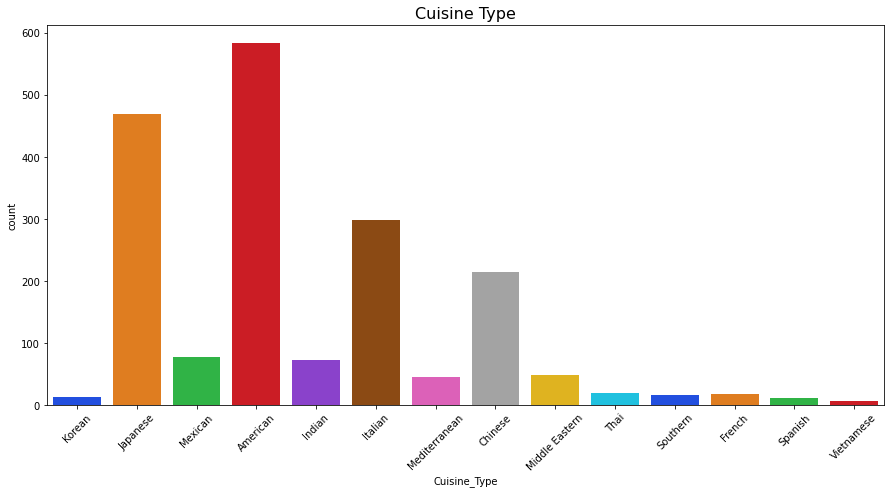

In [21]:
#Countplot for categorical value: cuisine type
plt.figure(figsize = (15,7))     # to increase the figure size for graph

plt.title( "Cuisine Type", loc = 'center', fontsize = 16) # Plot title on top of plot

# plot the countplot for distribution of different cuisines
sns.countplot(data = df, x = 'cuisine_type', palette = 'bright') 

plt.xlabel('Cuisine_Type')
plt.xticks(rotation = 45);  # To tilt the labels to an angle avoid crowding

#### Observation:
1. There are 14 distinct types of cuisines that were ordered in 1898 orders, and restaurant type can be deducted  from the type of cuisine.
2. Highest number of orders are placed (approximately 580) from American cuisine, which indicate restaurants with american cuisines have higher consumers market (especially for online delivery).
3. The second most popular cuisine ordered is japanese, which accounts for more than 450 orders, and clearly indicates japanese restaurants are 2nd most popular choice for food lovers.
4. American and Japanese are most favored cuisines for online orders and constitute more than 50% of total online food orders. 
4. Italian and Chinese are other two major cuisines preferred for online ordering, and each have more than 200 orders. 
5. Approximately 80% of online orders belong to the top 4 cuisine types: American, Japanese, Italian, Chinese.

#### Ratings
---





In [22]:
# Rating's unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

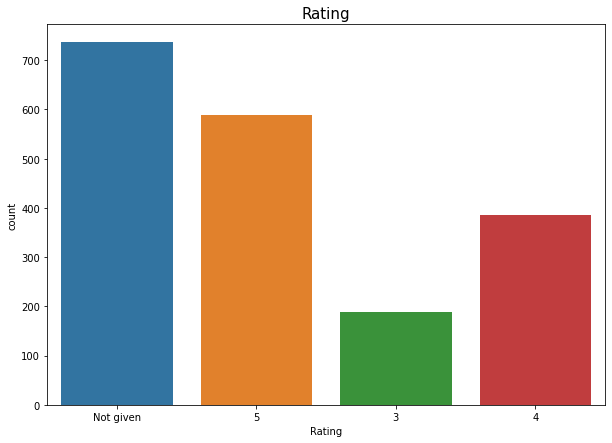

In [23]:
#Countplot for categorical value: Ratings
plt.figure(figsize=(10,7))
plt.title ("Rating", fontsize=15)
sns.countplot(data = df, x = 'rating')
plt.xlabel('Rating'); 

#### Observation:
1. The ratings have not been given for more than 750 orders in this data set.
2. Highest rating of '5' is given for atleast 570 orders, and lowest rating of '3' is given atleast 180 orders.
3. The 2nd highest rating of '4' is given to atleast 370 orders. 
4. No data is provided for rating '1' and '2' in this dataset.


####Inference 
1. As a lot of orders are without any ratings and ratings of (1, 2) are completely missing from the dataset, we can infer people tend to avoid giving lower ratings and rather prefer not giving any ratings. 
2. There could be possibility that food app does not have (1 or 2) on rating scale.

#### Order Cost
---



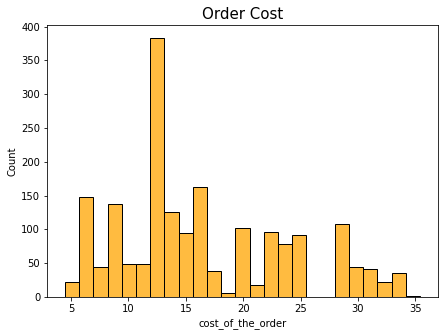

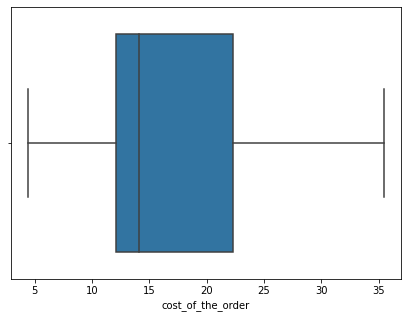

In [24]:
#Order Cost histogram and Boxplot for this numerical data 
plt.figure(figsize= (7,5))
plt.title('Order Cost', loc = 'center', fontsize = 15) 

sns.histplot(data=df,x='cost_of_the_order', bins = 25, color = 'orange') ## Histogram for the cost of order
plt.show() #plt show will plot two graphs separately
 
plt.figure(figsize= (7,5))
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

In [25]:
#To check the mode of cost of order in order to confirm unsual high counts around 12.5
df['cost_of_the_order'].mode()

0    12.18
dtype: float64

#### Observation
1. The unsual high count of 'Cost of order' at 12.2 compared to entire distribution indicate most online order were place around this price range.
2.The median value for "cost of order" is 14.14 and lowest online order is placed at price less than '5'.
3.The distribution is skewed to right with no outliers.

#### Day of the week
---



In [31]:
# # Check the unique values
df['day_of_the_week'].unique() 

array(['Weekend', 'Weekday'], dtype=object)

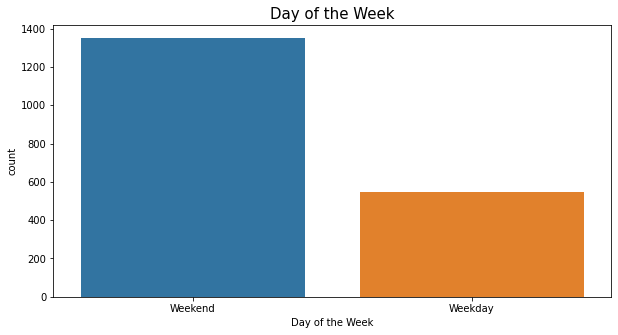

In [30]:
#Countplot for categorical value: Day of the Week
plt.figure(figsize= (10,5))
plt.title ("Day of the Week", loc = 'center', fontsize = 15) 
sns.countplot(data = df, x = 'day_of_the_week')
plt.xlabel('Day of the Week');


#### Observation:
More than 2/3 of online food orders are placed on weekends from this dataset.

#### Inference
High preference for online food orders on weekends could be attributed to various factors (relaxation, weekend party), and suggest a stronger consumer market.








#### Time for Food Preparation
---



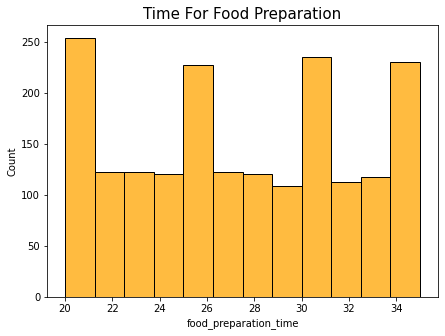

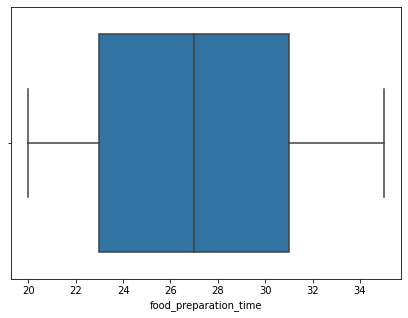

In [29]:
#Food Preparation time : histogram and Boxplot for this numerical data 
plt.figure(figsize= (7,5))
plt.title ("Time For Food Preparation", loc = 'center', fontsize = 15) 
sns.histplot(data=df, x ='food_preparation_time', color = "orange")
plt.show()

plt.figure(figsize= (7, 5))
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

#### Observation:
1. The data is pretty much normally distributed with no outliers present. 
2. The median time for food preprartion is around 27 mins, minmum time is 20 mins and maximum time is 35 mins.



#### Delivery time
---



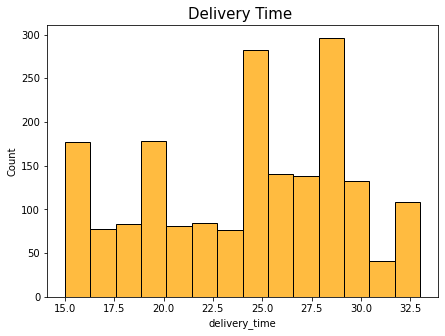

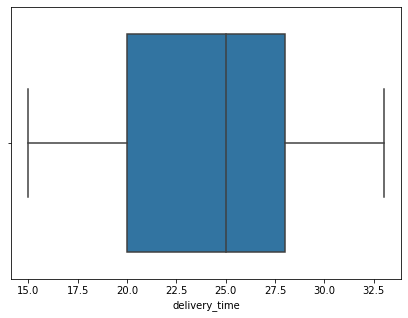

In [33]:
# Delivery time : histogram and Boxplot for this numerical data 
plt.figure(figsize= (7,5))
plt.title ("Delivery Time ", loc = 'center', fontsize = 15) 
sns.histplot(data=df,x='delivery_time', color ='orange')

plt.show()
plt.figure(figsize= (7,5))
sns.boxplot(data=df,x='delivery_time');


In [34]:
df['delivery_time'].mode()

0    24
dtype: int64

#### Observation:
1. The data is slightly left skewed data with no outliers present. 
2. The median delivery time for online order is 25 mins, minimum time is 15 mins and maximum delivery time is approximately 33 mins.
3. Atleast 25% of orders are delivered within a time range of 3 mins from 25 min to 28 mins (3rd quartile). 




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [35]:
# Since no data is missing and every order is unique order, the restaurant name will appear once for each order
# Total number of order = value count of restaurant name
HighOrder = df['restaurant_name'].value_counts()

print("Total Orders for top 5 restaurants are :\n", HighOrder.head(5))

Total Orders for top 5 restaurants are :
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


##### Additional Code

In [36]:
#Generalized code to count all the orders for the individal restaurants
Top5 = df.groupby(['restaurant_name']).order_id.count().sort_values(ascending=False)

print("Total Orders for top 5 restaurants are :\n", Top5.head(5))

Total Orders for top 5 restaurants are :
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64



#### Observations:

1. The "Shake Shack" American fast casual restaurant has the highest number of order 219, hence shows that it is the most popular chain for online food order service.
2. The Meatball shop and "Blue ribbon Fried Chicken" are also in top 5 restaurants serving american cuisines, which concurs the fact the american cuisines are most favorable dishes for online ordering.
3. The Japanese Blue ribbon Sushi has the third highest order with 119 and  Italian restaurant chain "Parm" has total 68 orders. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [39]:
# create new Dataframe "dfweekend" with the condition
dfweekend = df[df['day_of_the_week'] == 'Weekend']
dfweekend
dfweekend['cuisine_type'].mode() 

0    American
dtype: object

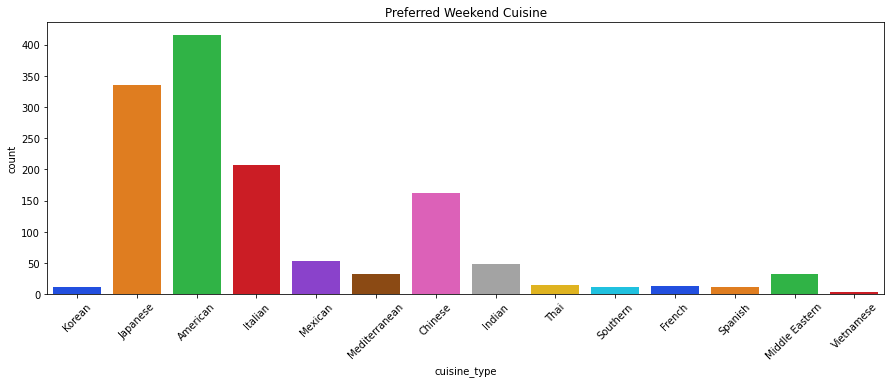

In [40]:
# Countplot of dfweekend can provide information about most popular cuisine 
plt.figure(figsize = (15,5))
plt.title('Preferred Weekend Cuisine')
sns.countplot(data = dfweekend, x ='cuisine_type', palette = 'bright')
plt.xticks(rotation=45);

#### Observations:
1. The most favorable cuisine type for online order is american cuisine which can be easily infered from mode and countplot of dataframe comprising of weekend data.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Generalized code
#Total number of 'cost of orders' = number of unique orders 
TotalOrder = df.shape[0]
print("Total Number of order placed", TotalOrder)

# df20 = Dataframe for which Cost of order > 20 
df20 = df[df['cost_of_the_order']>20] 

# This is fuction 'df.loc[df['cost_of_the_order']>20].value_counts().sum()'
df20.value_counts().sum() # Short code for cumbersome line above

Percentage = df20.value_counts().sum()*100/TotalOrder
print(' The Percentage of orders costed above 20 dollars', round(Percentage, 2) ,'%',)


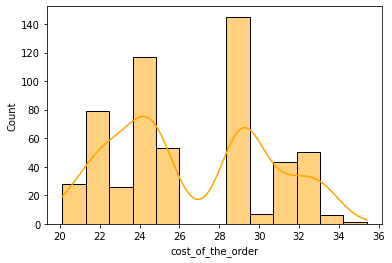

In [42]:
sns.histplot(data=df20, x='cost_of_the_order', color ='orange', kde=True);

### Observations:
1. Around 29% of online orders where above the cost of 20 dollars.
2. The dataframe df20 is bimodal data  with modes at 25 and 29


### **Question 10**: What is the mean order delivery time? [1 mark]

In [44]:
# Mean Order delivery time dfdtmean
dfdt_mean = df['delivery_time'].mean()
print (dfdt_mean)

print ('---'*10) # print dashes to separate the output
print('The mean delivery time: ',round(dfdt_mean, 2),'mins',sep = '')

24.161749209694417
------------------------------
The mean delivery time: 24.16mins


#### Observations:
The mean delivery time for online order is 24.16 mins for this dataset. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [47]:
# Frequent costomer = Higher No of times Customer_id ordered 
df["customer_id"].unique()
df["customer_id"].value_counts() #total number of individual "constomer id" in dataset

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [48]:
#Top 3 number of individual "constomer id" in dataset
df["customer_id"].value_counts().head(3) 

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The "customer id" of top 3 frequent 3 customers" are:
1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9  orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Correlation of all Numerical columns
---



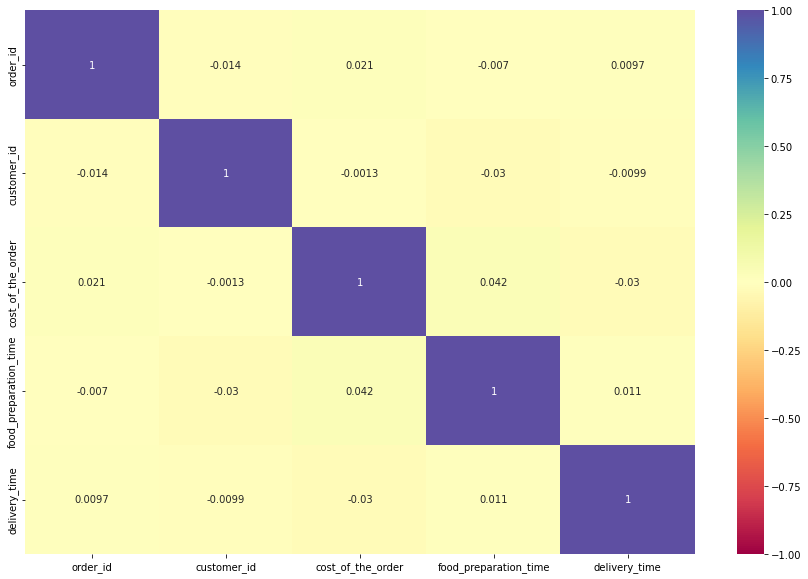

In [67]:
#Correlation of all Numerical columns
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral',vmin=-1,vmax=1);

#### Observation:
1. "Order id" and "customer ids" are numbers which refer to the identity of orders or customers and therefore not have any relevance in correlation data.
2. The correlation factor between order cost with food preparation or delivery time is too low to have any inpact. 
3. There is no correlation between food preparation and delivery time either.


#### Cuisine Type vs Order Cost
---



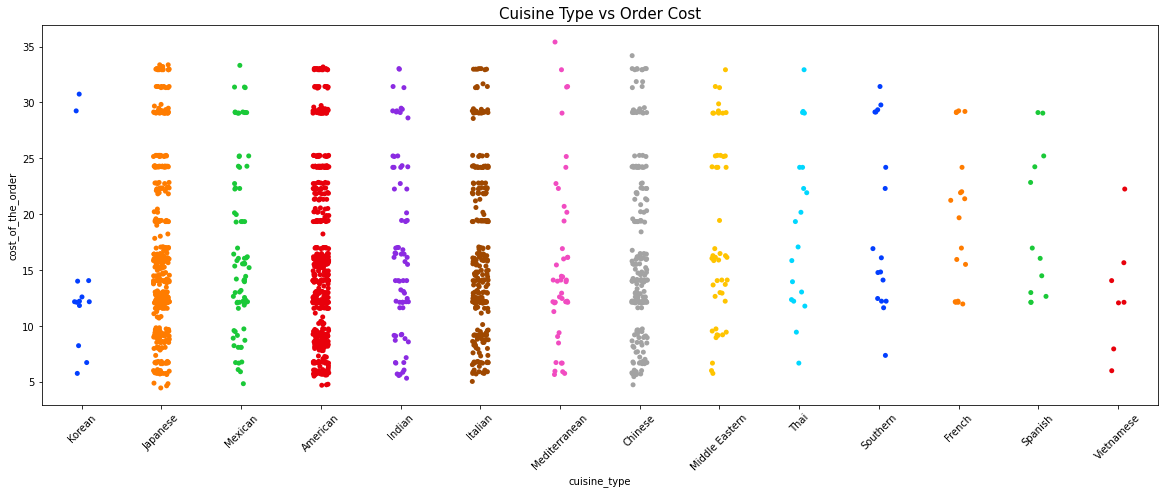

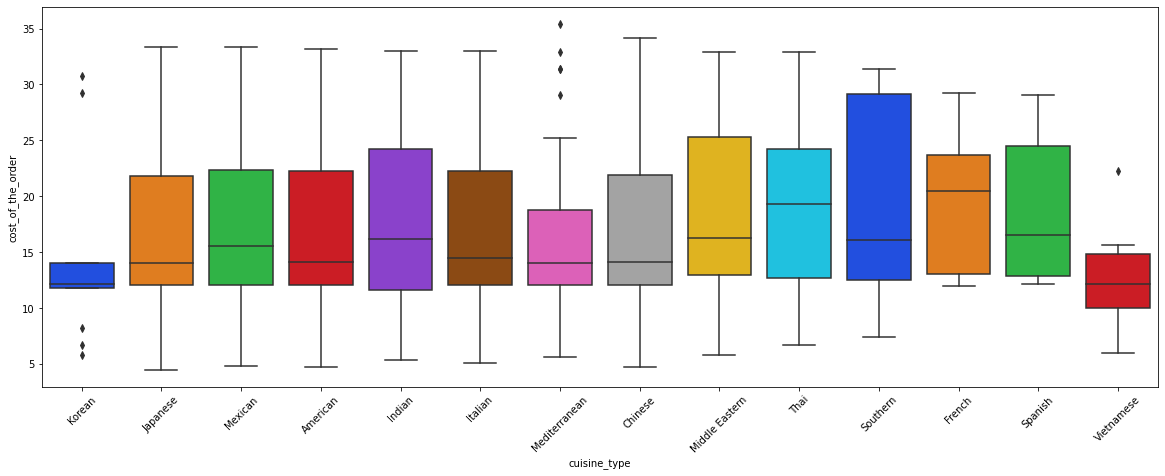

In [70]:
# Breaking the distribution of Food preparation time according tp cuisine type
plt.figure(figsize = (20,7))
plt.title( 'Cuisine Type vs Order Cost', loc = 'center', fontsize = 15)
sns.stripplot(data=df,x= "cuisine_type", y = 'cost_of_the_order', jitter = True, palette = 'bright')
plt.xticks(rotation=45);

plt.figure(figsize = (20,7))
sns.boxplot(data=df,x= "cuisine_type", y = 'cost_of_the_order', palette = "bright");
plt.xticks(rotation=45);

<Figure size 2160x720 with 0 Axes>

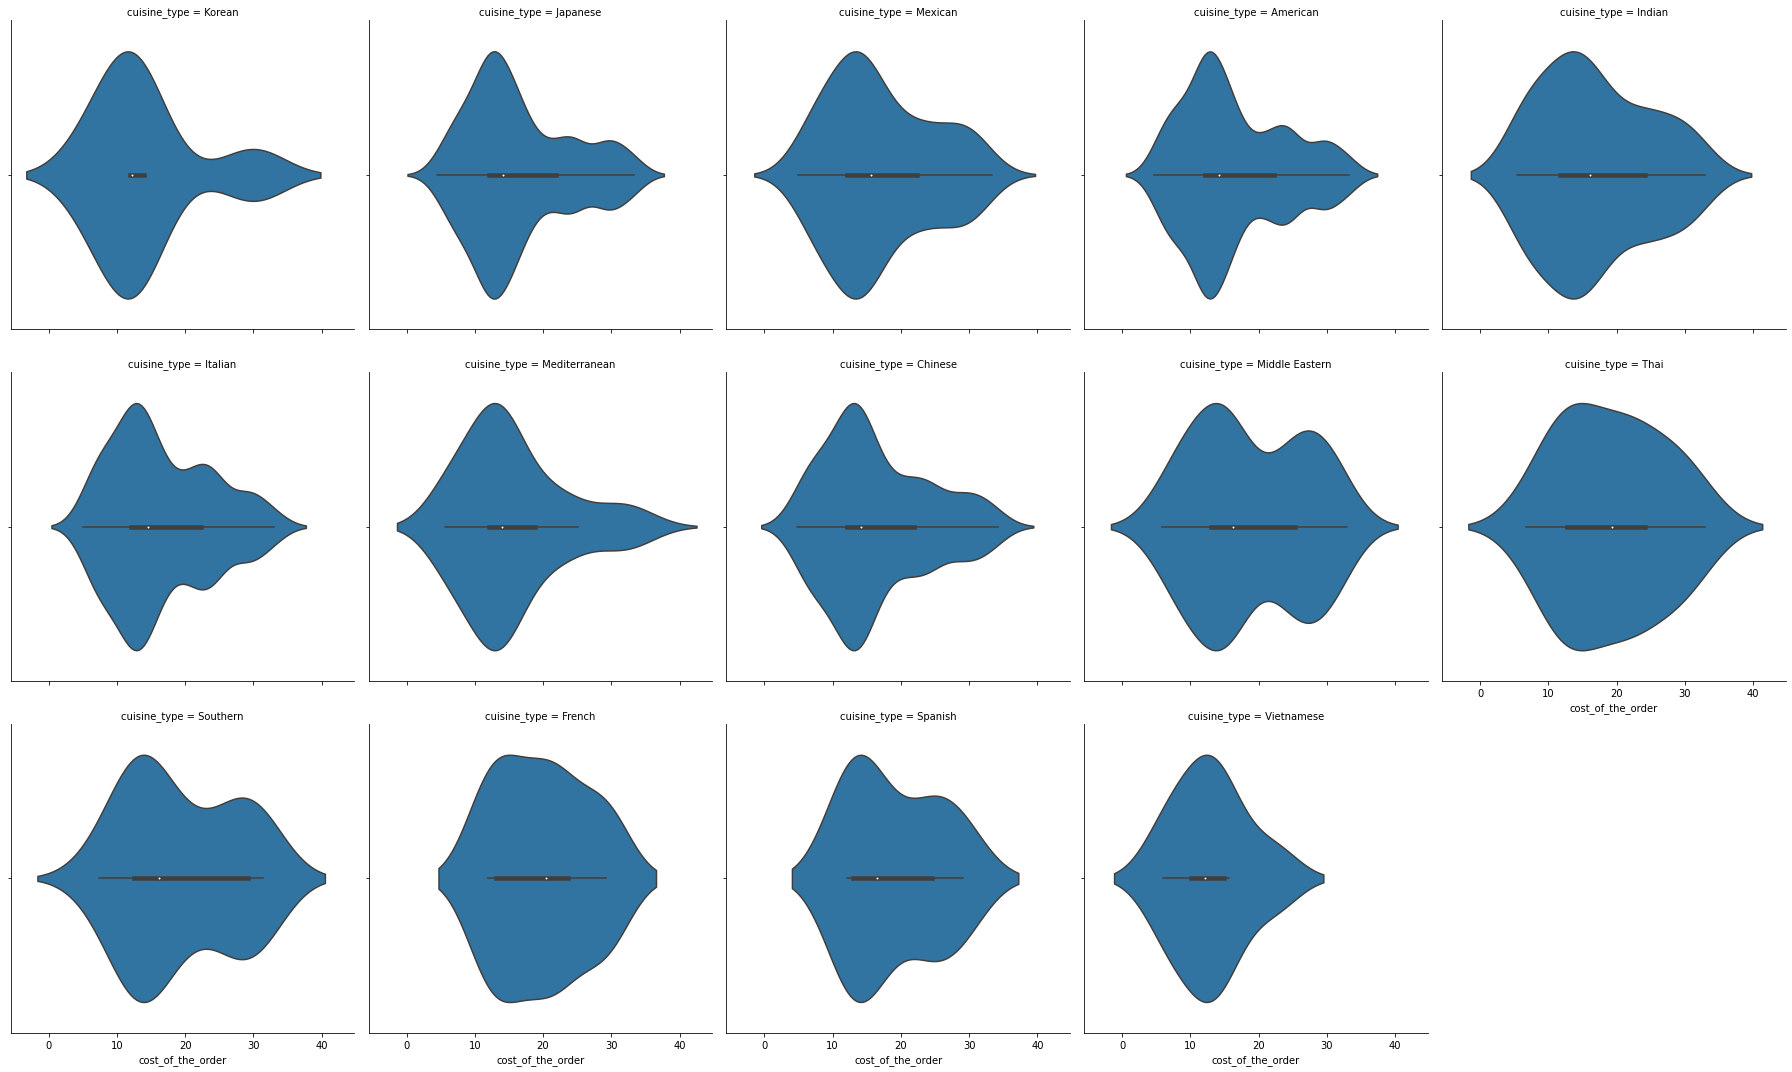

In [71]:
plt.figure(figsize = (30,10))
sns.catplot(data = df, x='cost_of_the_order', col="cuisine_type", col_wrap=5,  kind="violin")
plt.show();

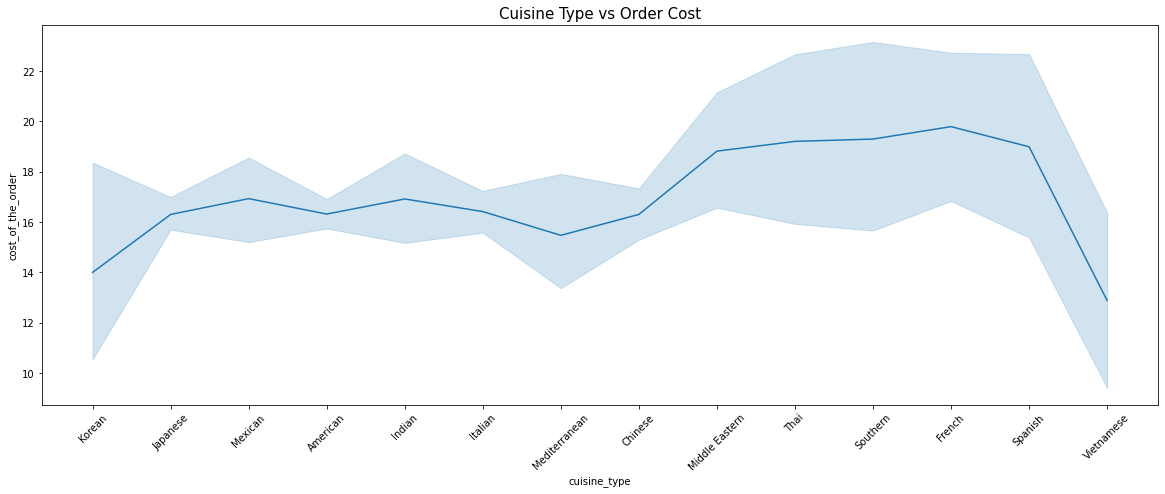

In [72]:
plt.figure(figsize = (20,7))
plt.title( 'Cuisine Type vs Order Cost', loc = 'center', fontsize = 15)
sns.lineplot(data=df,x= "cuisine_type", y = 'cost_of_the_order')
plt.xticks(rotation=45);


#### Observation:

1. Both the plots clearly indicate the cost of order for Korean and Vietnamese cuisine types is lower than 15 dollars with few outliers.
2. The minimum cost of French and Spanish cuisine orders are atleast around 12 dollars and significantly higher than the rest of cuisine types.
3. The french and vietnamese distribution are only two left skewed distributions; thai cuisine is normally distributed and the rest all are right skewed.
4. violin catplot indicates very high distribution density below 20 dollars for Korean, Japanese, American, Italian, Mediterranean, and Chinese cuisines.
5. The 4 most popular cuisine types : (American, Japanese, Italian, Chinese) have very similar distribution graphs with median around 14 dollars and cost ranges from 5 to 35 dollars.
6. The wide confidence interval (ci) for cuisine (Korean, Southern, french, Spanish, Vietnamese), indicates high variance for order cost. Very low density of data from these cuisines could be one factor for this high variance.




#### Cuisine Type vs Food Prepration Time
---




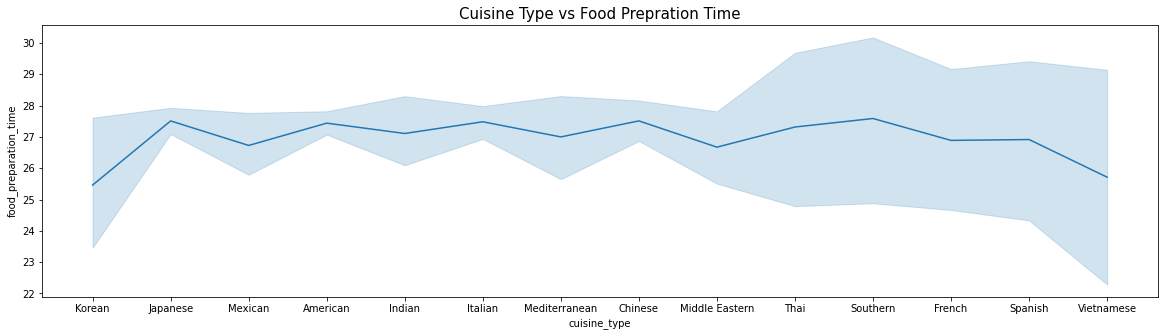

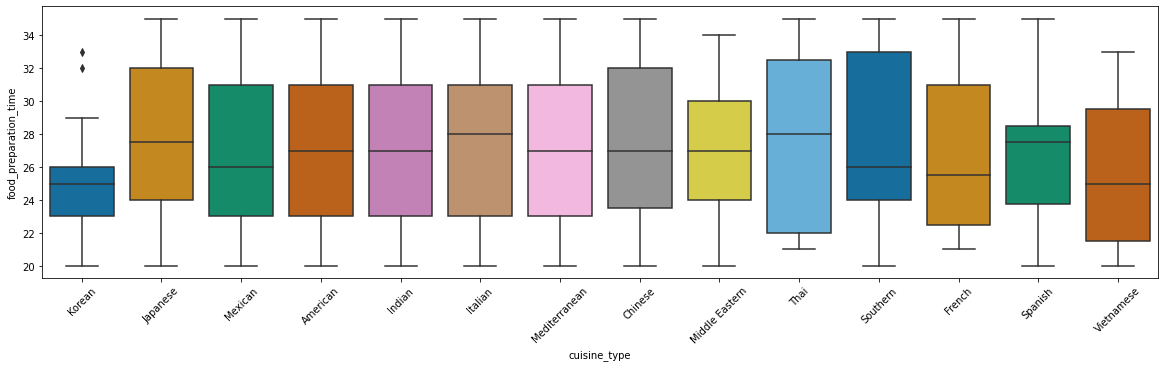

In [74]:
# Breaking the distribution of Food preparation time according tp cuisine type
plt.figure(figsize = (20,5))
plt.title( 'Cuisine Type vs Food Prepration Time', fontsize = 15)
sns.lineplot(data=df,x= "cuisine_type", y = 'food_preparation_time')
plt.show()

plt.figure(figsize = (20,5))
sns.boxplot(data=df,x= "cuisine_type", y = 'food_preparation_time', palette = "colorblind");
plt.xticks(rotation=45);

#### Observation"
1. The maximum time for food preparation is more than 34 mins for most of cuisine type except Korean, Vietnamese and Middle Eastern
2. The box plots for American, Indian, Mediterranean are normally distributed with a median time of 27 mins for food preparation.
3. Korean cuisine requires less time for food preparation except in a few outliers.
4. The wide confidence interval for cuisine (Korean, Southern, French, Spanish, Vietnamese), indicates the mean preparation time has a high variance of 5-6 mins. Very low density of data from these cuisines could be one factor for this high variance.




#### Day_of_the_week vs Delivery time
---



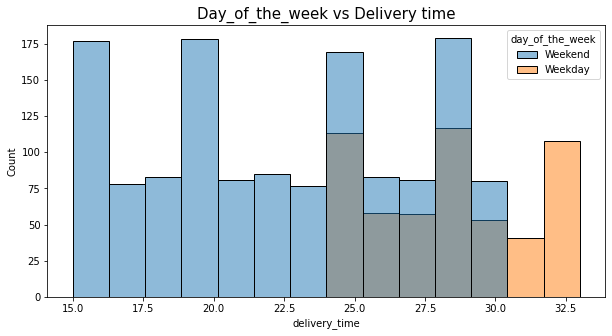

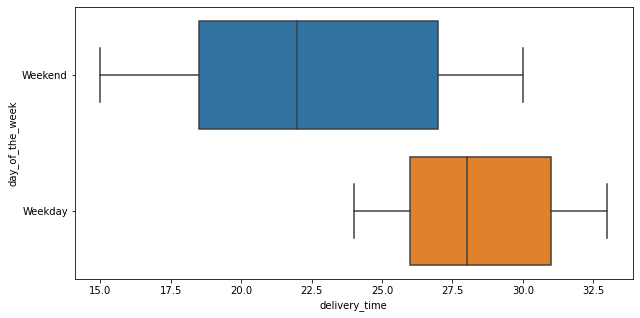

In [75]:
# Breaking the distribution: 'Day_of_the_week vs Delivery time'
plt.figure(figsize = (10,5))
plt.title('Day_of_the_week vs Delivery time', fontsize = 15)
sns.histplot(data=df, x='delivery_time', hue = 'day_of_the_week');
plt.show()
plt.figure(figsize= (10,5));
sns.boxplot(data=df,x='delivery_time', y = 'day_of_the_week');


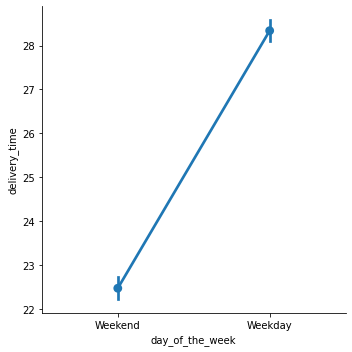

In [76]:
#catplot can provide the information about mean delivery time
sns.catplot(data=df, x= 'day_of_the_week', y = 'delivery_time', kind = 'point');

#### Observation:
1. The delivery time is widely distributed on weekends as minimum time to deliver is 15 mins and maximum time is around 31 mins.
2. The minimum time to deliver on weekdays is atleast 23 mins and maximum time is around 33 mins. 
3. The median delivery time is around 22.4 mins on weekends and around 28 mins on weekdays. 
#### Inference 
There is a 50% chance that food will be delivered within 23 mins on weekends whereas on weekdays it will not be possible to deliver in that time frame.
The slow delivery time on weekdays could be one of the reasons for less online orders compared to weekends.



#### Ratings vs Order Cost
---



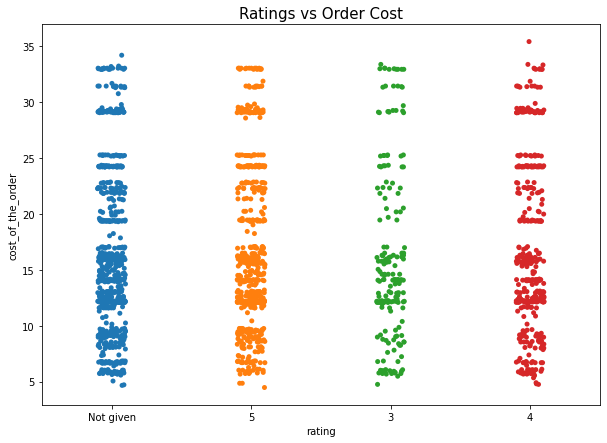

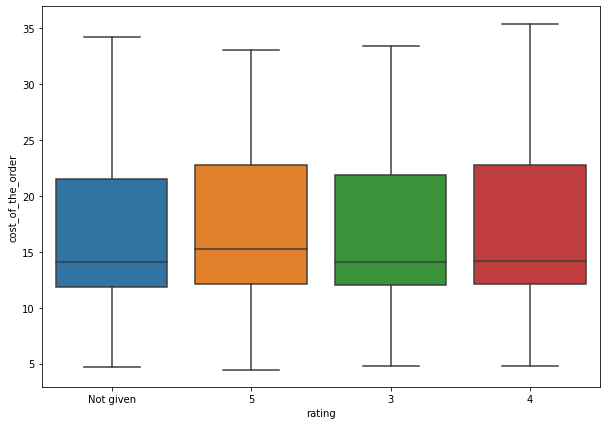

In [77]:
# Ratings vs Order Cost : with Stripplot, Boxplot, catplot
plt.figure(figsize = (10,7))
plt.title('Ratings vs Order Cost', fontsize = 15)
sns.stripplot(data=df, x= "rating", y = 'cost_of_the_order');
plt.figure(figsize = (10,7))
sns.boxplot(data=df,x= "rating", y = 'cost_of_the_order',);


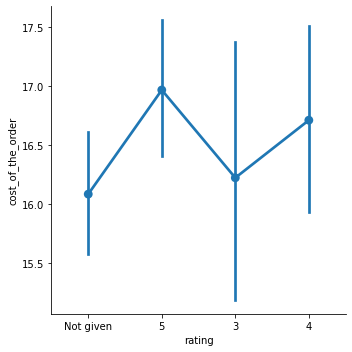

In [78]:
sns.catplot(data=df, x= "rating", y = 'cost_of_the_order', kind = 'point');

Non Null Ratings: For which ratings are provided

In [80]:
print (df['rating'].value_counts())
#data where Rating without number is removed 
df1 = df[df['rating'] != 'Not given']
df1.head()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [81]:
df1['rating'] = df1['rating'].astype(int)

<ipython-input-81-1f1909daffd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rating'] = df1['rating'].astype(int)


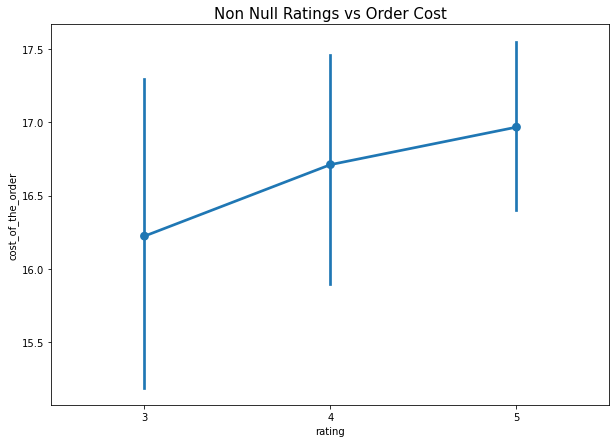

In [82]:
plt.figure(figsize = (10,7))
plt.title('Non Null Ratings vs Order Cost', fontsize = 15)
sns.pointplot(data=df1, x= "rating", y = 'cost_of_the_order',);

#### Observation:

1. All 4 box maps of ratings are right skewed with no outliers.
2. The third quartile Q3 is around 21 for orders with rating of 3 or 'Not Given' rating.
3. The third quartile Q3 is at 22.5 for orders with ratings of 4 and 5.  
4. The median order-cost is around 14 dollars for ratings 3 and 4 whereas the mean cost of 4 is higher 16.6 than 16.2 for 3. 
5. The mean of order-cost for ratings 3 is 16.25 with quite wider ci interval of 15.2 to 17.4 (due to less density of data for rating 3)  
6. The pointplot of non null ratings clearly indicates mean cost 
positively correlated with rating and with more defined ci intervals.
7. The stripplot shows an order cost between 19 to 23 dollars, very few ratings of 3 are given as compared to 5 and 4.
8. The mean of cost has clear variance with respect to ratings as compared to median,and therefore better stats to compare. 

#### Inference
The mean cost has positive correlation with respect to ratings, therefore higher rating means  higher probability that customers will order food items with a higher total cost. 






#### Ratings Vs Food Preparation
---



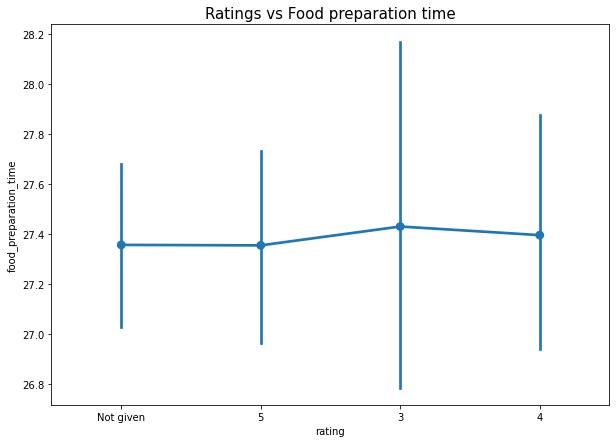

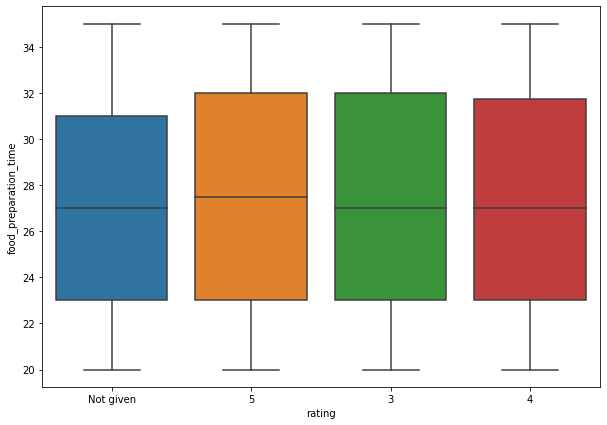

In [84]:
# Ratings vs Food Preparation time
plt.figure(figsize = (10,7))
plt.title('Ratings vs Food preparation time', fontsize = 15)
sns.pointplot(data=df,x= "rating", y = 'food_preparation_time');
plt.show()

plt.figure(figsize = (10,7))
sns.boxplot(data=df,x= "rating", y = 'food_preparation_time');



#### Observation:
1. The preparation time is consistent for all 4 rating-sub types is around 27.3 to 27.4 mins.
2.  Higher variance in data for rating 3 could be attributed to lower data density for this column as compared to other 3 columns.
3. There is not much visible correlation in food preparation time with respect to ratings.


#### Ratings vs Delivery time
---



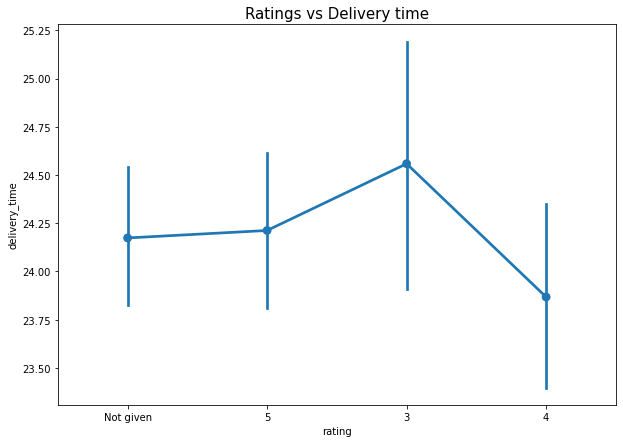

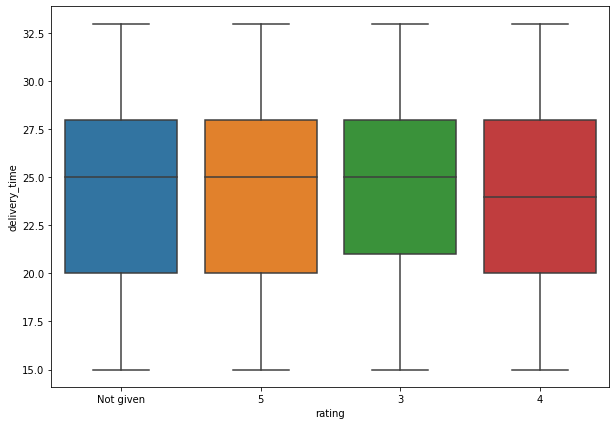

In [85]:
#Ratings vs Delivery time
plt.figure(figsize = (10,7))
plt.title('Ratings vs Delivery time', fontsize = 15)
sns.pointplot(data=df, x= "rating", y = 'delivery_time');
plt.figure(figsize = (10,7))
sns.boxplot(data=df,x= "rating", y = 'delivery_time');

#### Observation:
1. The higher mean delivery time above 24.5 is quite correlated to rating of 3.
2. The mean delivery time for rating 4 is 23.85 with ci interval lying between 23.40 to 24.40.
3. The mean delivery time for rating 5 is 24.25 and within ci interval of 23.8 and 24.55.
4. The lower mean delivery time for 4 clearly indicated other factors like (food preparation time, quality of food etc) were more responsible for losing a point in the ratings. 

#### Restaurant Revenue
---



In [86]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [64]:
# Calculate revenue of restaurants 
dfrevenue = df.groupby(['restaurant_name']).cost_of_the_order.sum().sort_values(ascending=False)
dfrevenue

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

In [87]:
dfrevenue2 = dfrevenue[dfrevenue > 100]
dfrevenue2.shape

(56,)

In [88]:
dfrevenue[dfrevenue < 10]

restaurant_name
Lamarca Pasta                    9.22
Balade                           9.22
Gaia Italian Cafe                8.78
Chola Eclectic Indian Cuisine    8.73
Woorijip                         8.25
'wichcraft                       8.10
La Follia                        8.05
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, dtype: float64

#### Observation:

1. The "Shake Shack" American fast casual restaurant has the highest revenue of 3579.53, with highest orders as well and hence is the most popular chain for online food order service.
2. The Meatball shop has revenue of 2145.21 dollars and "Blue ribbon Fried Chicken" has revenue of 1662.29 dollars which further solidifies the conclusion that the restaurants catering american cuisines are most favored for online ordering.
3. The Japanese Blue ribbon Sushi is the third highest in terms of revenue generation and generated revenue of 1903.95 dollars.
4. The Italian chain Parm generated revenue of 1112.76 dollars.
5. Apart from the top 5 restaurants, the revenue generated by other restaurants is less than 1000 dollars.
5. Out of 178 restaurants, only 56 restaurants have managed to generate revenue of more than 100 dollars.
6. There are 12 restaurants which generated revenue less than 10 dollars. 



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [89]:
df['rating'] != 'Not given' # Number of rows which have rating 

# new dataframe which consitute of rows with ratings 
dfrating = df[df['rating'] != 'Not given']
dfrating.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [90]:
# Change the type of rating to 'int'
dfrating['rating'] = dfrating['rating'].astype(int)
dfrating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


<ipython-input-90-13c1b5745266>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrating['rating'] = dfrating['rating'].astype(int)


In [91]:
# grouped the data on restaurant name , and then count no. of time ratings with descending sorting 
dfrating.groupby(['restaurant_name']).rating.count().sort_values(ascending=False)

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Frank Restaurant               1
Socarrat Paella Bar            1
El Parador Cafe                1
Lucky Strike                   1
'wichcraft                     1
Name: rating, Length: 156, dtype: int64

There are 4 restaurants which are rated more than 50 times. 
1. Shake Shack                  133
2. The Meatball Shop             84
3. Blue Ribbon Sushi             73
4. Blue Ribbon Fried Chicken     64

In [92]:
# group the rating data according to restaurant name and than calculate rating counts
dfrating50 = dfrating.groupby(['restaurant_name']).rating.count()

# Rename rating to Count_rating in dfrating50
dfrating50 = dfrating50.rename("Count_rating")

print(type(dfrating50)) 
print('---'*10)
dfrating50 

<class 'pandas.core.series.Series'>
------------------------------


restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Amma                 2
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: Count_rating, Length: 156, dtype: int64

In [93]:
# check few rows for the panda series
print(dfrating50['Shake Shack'])
print(dfrating50['Amma'])

133
2


In [94]:
# group the rating data according to restaurant name and than calculate average with mean
dfavg4 = dfrating.groupby(['restaurant_name']).rating.mean() 

# Rename rating to Avg_rating in dfavg4
dfavg4 = dfavg4.rename("Avg_rating")

print(type(dfavg4))
print('---'*10)
dfavg4 

<class 'pandas.core.series.Series'>
------------------------------


restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Amma                4.500000
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: Avg_rating, Length: 156, dtype: float64

In [95]:
# check the average rating for restaurants with rating count > 50 
print('Avergae rating for Shake Shak:', round(dfavg4['Shake Shack'], 2))

print('Avergae rating for The Meatball Shop:', round(dfavg4['The Meatball Shop'], 2))

print('Avergae rating for Blue Ribbon Sushi:',round(dfavg4['Blue Ribbon Sushi'], 2))

print('Avergae rating for Blue Ribbon Fried Chicken:',round(dfavg4['Blue Ribbon Fried Chicken'],2))

Avergae rating for Shake Shak: 4.28
Avergae rating for The Meatball Shop: 4.51
Avergae rating for Blue Ribbon Sushi: 4.22
Avergae rating for Blue Ribbon Fried Chicken: 4.33


##### Another way to calculate by concating 2 Series

In [96]:
# Concat two different sseries dfrating50 and dfavg4
dfnew = pd.concat([dfrating50,dfavg4],axis=1)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 'wichcraft to indikitch
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Count_rating  156 non-null    int64  
 1   Avg_rating    156 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.7+ KB


In [97]:
dfnew.head()

,Count_rating,Avg_rating
restaurant_name,,
'wichcraft,1,5.0
12 Chairs,2,4.5
5 Napkin Burger,2,4.0
67 Burger,1,5.0
Amma,2,4.5


In [98]:
# dfnew for which count rating > 50
dfnew['Count_rating'] > 50 

restaurant_name
'wichcraft          False
12 Chairs           False
5 Napkin Burger     False
67 Burger           False
Amma                False
                    ...  
Zero Otto Nove      False
brgr                False
da Umberto          False
ilili Restaurant    False
indikitch           False
Name: Count_rating, Length: 156, dtype: bool

In [99]:
# Sort the data of restaurants which are rated above 50 times
dfnew[dfnew['Count_rating'] > 50] 

,Count_rating,Avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


In [100]:
#Sort the data of restaurants rated more than 50 times and and 4 above ratings
dfnew[(dfnew['Avg_rating'] > 4 ) & (dfnew['Count_rating'] > 50)]

,Count_rating,Avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observation: 
There are 4 restaurants which are rated more than 50 times, and all have average rating more than 4.
1. Shake Shack                  4.28
2. The Meatball Shop            4.51
3. Blue Ribbon Sushi            4.21
4. Blue Ribbon Fried Chicken    4.32

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [101]:
# Define the fuction revenue with given conditions for order cost
def Revenue(s):
  if s > 20 :
    return s*.25
  elif s > 5:
    return s*.15
  else:
    return s*0

In [102]:
df['revenue'] = df['cost_of_the_order'].apply(Revenue) #apply fuction Revenue to each cost of order and return to new column 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [103]:
TotalRevenue = df['revenue'].sum()
print('Total revenue generated by company :', TotalRevenue)

Total revenue generated by company : 6166.303


#### Observations:
1. The order above 20 dollars are more profitable to company with revenue at 25% of order cost.
2. Total revenue generated by the company for all the orders is 6166.303 dollar for given database.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [104]:
# Calculate total time and add a new column of total time in df
df['TotalTime'] = df['delivery_time']+df['food_preparation_time']

In [105]:
df.head() # new column added

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,TotalTime
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [106]:
# Data for which Total time > 60
df['TotalTime'] > 60
Df60 = df[df['TotalTime'] > 60]
Df60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,TotalTime
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [108]:
#Total number of Orders placed = number of unique orders 
TotalOrder = df.shape[0]
print("Total Number of oder placed", TotalOrder)

# Total number of orders with total time >60
print('Order with total time > 60: ', Df60.shape[0])

Percentage_60 = Df60.shape[0] * 100 / TotalOrder
print('No. of order which took > 60 mins after order placement', round(Percentage_60, 2), '%')

Total Number of oder placed 1898
Order with total time > 60:  200
No. of order which took > 60 mins after order placement 10.54 %


#### Observations:
1. Atleast 10% of orders took more than 1 hour for delivery after the order was placed.
2. Most of the orders (90%) are delivered within 60 mins of ordering.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [109]:
# Mean delivery time for weekend
df['day_of_the_week'] == 'Weekend'
Mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(round(Mean_weekend, 2))

# Mean delivery time for weekdays
df['day_of_the_week'] == 'Weekday'
Mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print(round(Mean_weekday, 2))

22.47
28.34


In [110]:
print('The mean delivery time for weekend :', round(Mean_weekend, 2), 'mins')
print('The mean delivery time for weekend :', round(Mean_weekday, 2), 'mins')


The mean delivery time for weekend : 22.47 mins
The mean delivery time for weekend : 28.34 mins


#### Observations:
1. The mean delivery time for the weekend is 22.4 mins as compared to 28.3 mins on weekdays.
2. The average (6mins) lower delivery time can be attributed to less traffic on weekends with less office traffic on roads.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

I have analyzed the data collected from FoodHub which offers access to multiple restaurants of NY from smartphone app. The app allows the customer’s to order food from restaurants which is then delivered to their location. The stored data of registered customer is analyzed to know the demand of different restaurants which can help in enhancing the user experience and company’s business. 


### Conclusions:
1. There are 1200 registered users on the Foodhub app, and at least 178 restaurants have been affiliated with the system catering around 14 distinct cuisines type.
2. Highest number of orders are placed from American cuisine, which indicates restaurants with american cuisines have a higher consumers market (especially for online delivery).
3. American and Japanese are two most favored cuisines for online orders and constitute more than 50% of the total order.
4. Out of 14 different cuisines, 80% of online order belongs to top 4 cuisine types: American, Japanese, Italian, Chinese
5.  At Least one fifth of the total online orders are placed at a cost of around 12.5 dollars.
6. Korean and Vietnamese cuisines are usually the cheapest cuisines (<15 dollars)  to order whereas French and Spanish cuisines are quite expensive (> 12 dollars) as compared to the rest of cuisines. 
7. Usual time for preparation for Korean cuisine is low and therefore probably will have  a higher chance of quicker delivery than other cuisines. 
8. More than two third of online food orders are placed on weekends which suggests a stronger consumer market for online ordering.
9. The ratings have not been given for more than 750 orders and ratings of 1 and 2 are completely missing from data, we can infer people tend to avoid giving low ratings and not rate at all for those orders.
10. The average cost has positive correlation with respect to ratings therefore  higher rating will increase the  probability of restaurants getting order’s with  higher cost.
11. Due to less office or school traffic, the  average delivery time to deliver food on weekends (22.4 mins) is around 6 mins lower as compared to 28.3 mins on weekdays.
12. There is a 50% chance that food will be delivered within 23 mins on weekends whereas on weekdays it will not be possible to deliver in that time frame.
13. Irrespective of day, most of the orders (90%) are delivered within 60 mins of ordering.
14. The order above 20 dollars is more profitable to a company with a revenue stream of 25% of order cost and at least 29% of orders are above 20 dollars.
15. Total revenue generated by the company for all the orders is 6166.303 dollars for the time period. 











### Recommendations


* American, Japanese, Italian are the best restaurants for online orders,therefore more restaurants catering these cuisines should be included in the system.
*   As customers tend to avoid giving lower ratings, additional “points for rating” features can be added to the app which will reward them for providing true ratings to the restaurants. 
*    Real Low ratings are very crucial for the improvement of the business, as it will help in improving the service from that restaurant and will allow Foodhub to further decide if a restaurant with very low ratings or orders should be continued in the system.
*   As proved from this study, higher ratings of restaurants is quite an important deciding factor if a customer is  ready to pay a higher price for the order. order at higher cost orders. The restaurants with higher ratings should be given additional promotional offers to further boost their sales.
*  The promotional offer in the advertisement of the restaurants can be provided to these 4 restaurants with the highest revenue stream and average rating above 4. 
  1. Shake Shack
  2. The Meatball Shop 
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken
*  The 12 restaurants which generated revenue less than 10 dollars, can be dropped from the service or charged minimum fees for being affiliated with the app. 
*  The slow delivery time on weekdays could be one of the reasons for less online ordering on weekdays as compared to weekends. With limited control on traffic, weekdays sales can be boosted by providing customized  promotional offers for restaurants which are in the vicinity of the customer's location.
*   The  top 3 most frequent customers for 20% discount vouchers are:
  1. Customer id : 52832   
  2. Customer id : 47440  
  3. Customer id : 83287    
